In [2]:
# this is some code to get pretty highlighted cells for the questions - ignore this
from IPython.display import HTML
style1 = "<style>div.warn { background-color: #fcf2f2;border-color: #dFb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;}</style>"
HTML(style1)

This notebook covers some worked examples and some examples for you to try relating to **Block B, Chapter 5** in the notes.  This is practice and core material for coursework 2 and 3. The green questions are those most closely related to the assessed work for this module. *Once you have completed this workbook you should be able to attempt QN 1 and part of QN 2 on coursework 2. *


## Core concepts

### Bayes vs Frequentist

The frequentist will ask "how likely is the data given the model" and the Bayesianist will ask "how likely is model given the data".

For frequentists, a probability is a measure of the frequency of repeated events, so the interpretation is that parameters are fixed (but unknown), and data are random.

For Bayesians, a probability is a measure of the degree of certainty about values, so the interpretation is that parameters are random and data are fixed.

In the Bayes viewpoint, PDFs *quantify uncertainty in estimating the data* and probability $p(x)$ describe how the probability is distributed over possible values of $x$ that might have been measured in a single trial.

Frequentists instead say PDFs *quantify variability in a sequence of trials* such that $p(x)$ instead describes how the values of x would be distributed among infinte trials $N$.


### Choice of priors

**Normal distributions**

Suppose that we have a set of observations $X = {x_1, x_2, \ldots, x_n}$ of some quantity that we believe to have been drawn from a normal distribution. We can then write,

$p(x|\theta) = N(\theta, \sigma^2)$

where $\theta$ is the mean value of the distribution (unknown) and $\sigma$ describes the width (known).

We can then also write the probability of the mean of the sample, $\hat X$, as,

$p(\hat X | \theta) = N(\theta, \sigma^2/n)$

since as we make more measurements our estimate of the mean gets better (recall the difference between the error and the standard error on the mean!).

Now suppose that we have some data from a previous study that reports a value for $\theta$ of $\mu_0$, with an associated error, $\sigma_0$. This study was also subject to random errors, so we are free to write,

$p(\theta) = N(\mu_0, \sigma_0^2)$

Bayes theorem allows us to combine this information to determine the PDF of $\theta$.  Since the denominator is the integral over all $\theta$, it is just a constant, and so it doesn't affect the shape of the posterior, only the height. As such, we can ignore it for the moment, and focus on the numerator (i.e. the likelihood times prior).

Since both the likelihood and prior are normal distributions, the posterior must also be a normal distribution, this leads to the following expressions for the mean and standard deviation of the posterior.

$ \hat{\theta}  = \dfrac{\sigma_0^2}{\sigma_0^2 + \sigma^2/n} \hat{X}   +  \dfrac{\sigma^2/n} {\sigma_0^2 + \sigma^2/n} \mu_0
$

$\hat{\sigma}^2 =  \dfrac{\sigma_0^2 \sigma^2/n} {\sigma_0^2 + \sigma^2/n}.$

A nice way of thinking about this interplay between the prior and likelihood, is to imagine that the prior is simply adding another data point. If this data point is good (i.e. small variance, such that it is strongly peaked around the mean), then the prior pulls the posterior towards it. If the prior is vague, then it behaves like a data point with a big error, and the posterior relies on the data to provide the underlying shape. This is same behaviour, and indeed very similar maths, to the idea of *weighted averages* that we discussed in Block A.

At this point, you are probably wondering why we've neglected the evidence! As we mentioned briefly above, the evidence is just a normalisation for the problem. Often, we can ignore the evidence. For example when we just cared above about the mean and variance of the posterior,  the normalisation is not important. Also, if we simply want to the know the ratio of $\theta$ taking two values, we again don't need to know the normalisation of the posterior, so we can ignore the evidence. Similarly, if we are just interested in finding the overall shape of the posterior.

However, we've established that for the case of a normal likelihood, and a normal prior, the posterior is also normally distributed. Also, we've already worked out the width parameter of the normal, so in this case, it is trivial to normalise the posterior, and thus create a true PDF.

For problems where we really do want to know the actual probabilities, but where the maths is tricky, we can still work without evaluating the evidence in many cases. For example, one can get a crude approximation to a normalised posterior by first making a *histogram* of the posterior, and then numerically integrating to find the total area under the histogram. If one then divides the original histogram by this area, the result is a normalised histogram of the posterior, and as we mentioned early in Block A, this is an approximation to the posterior's underlying PDF.

**Conjugate Priors**

A *conjugate* prior is one that has the same functional form as the posterior. In this first example here, we've seen that if the likelihood is normally distributed, then the choice of a normal prior will ensure that the posterior is also a normal, and as such, our prior can be said to be conjugate. This is generally a good thing! Typically, it ensures that the mathematics is possible - it might still not be trivial, but at least it often is analytically tractable. 

Even if the true functional form of the posterior is *not* conjugate, it is common practise to approximate the prior distribution with a function that is, simply because it makes the mathematics easier, and it makes the functions behave! Note that the prior is only conjugate when we consider likelihoods of a certain functional form.

**Binomial/Bernoulli Distributions**

After the normal likelihood, Binomial/Bernoulli distributions are probably the second most common form, since it covers a wide range of problems, such the ski test we saw earlier in the course, drug trials, etc. The conjugate prior to this is is a beta function determined by shape parameters $a$ and $b$.

The posterior mean is then given by,

$\hat{\theta}  = \dfrac{ \nu + a }{N + a + b} = \dfrac{ \nu }{ N }\, \dfrac{ N }{ N + a + b }~ +~ \dfrac{ a }{ a + b} \, \dfrac{a + b}{ N + a + b }$

and the variance is 

$\sigma^2  = \dfrac{ \hat{\theta}(1 - \hat{\theta})}  {\nu+a + N-\nu+b + 1}.$

### Credible Intervals


In Bayesian statistics, a credible interval is an interval within which an unobserved parameter value falls with a particular probability.

Recall that in Bayesianism, the probability distributions reflect our degree of belief. So when we compute the credible region it is equivalent to saying

<font color=blue>"Given our observed data, there is a 95% probability that the true value of $\mu$ falls within the CR"</font> - Bayesians

In frequentism, on the other hand, $\mu$ is considered a fixed value and the data (and all quantities derived from the data, including the bounds of the confidence interval) are random variables. So the frequentist confidence interval is equivalent to saying

<font color=red>"There is a 95% probability that when I compute confidence intervals from data of this sort, the true mean will fall within the confidence interval."</font>- Frequentists 

Another way to think about this is that frequentists state there is a 95% probability that we will collect data that produces an interval that contains the true parameter value.   Whereas Bayesians will state based on the data, we now think there is a 95% probability that the true parameter value is in the interval.

Here's another way again:

Suppose we read that the observed data $D_{\rm obs}$ support conclusion $C$. How do the two parties see this?

<font color=red>"C was selected with a procedure that is right 95% of the time over a set of $D$ that includes $D_{\rm obs}$."</font> - Frequentist 

<font color=blue>"The strength of the chain of reasoning from the model and $D_{\rm obs}$ to concluding C has probability 0.95."</font> - Bayesian

Credible intervals for Gaussians produce similar results to confidence intervals, but this is because of the properties of Gaussians.

***

### Worked example of Region Of Practical Equivalence (ROPE) in Bayes Framework

**Question:**

We are given a coin at random, and asked to perform 50 flips. We find that heads comes up 35 of the 50 times. Is the coin a fair coin?

**Answer:**

The probability of obtaining the resulting series of heads (success) and tails (fail) is given by the Binomial distribution (since it is one coin flipped in a sequence of events/successes.

$p(\nu=35|N=50,\theta) = \theta^N(1-\theta)^{(N-\nu)}$

Since we were given the coin at random and we know nothing about it, we will adopt a uniform prior.

$p(\theta) = 1$ f or $0 < \theta < 1$.

Note that in this example I will write this simple as $p=1$ for all $x$  but a uniform prior for Bernoulli/Binomial family is equivalent to a beta function with $a=1,b=1$, so we could also write it as a beta function (we can also be written in the format = Beta(1,1)).

Our null hypothesis is that the coin is fair ($\theta=0.5$).

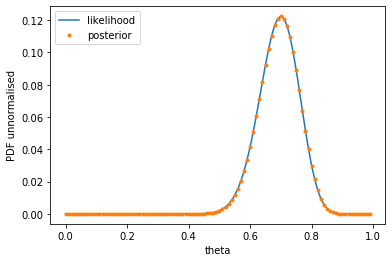

In [21]:
import numpy as np
import pylab as plt
import math

%matplotlib inline

nu = 35
N=50

# for plotting
nsteps=100

x = np.arange(0,1,1./nsteps)

likelihood = (math.factorial(N)/(math.factorial(nu)*(math.factorial(N-nu))))*x**nu * (1 - x)**(N - nu) 

# prior is constant = 1 for all x so need to make this an array
prior = [1.0 for i in range(0,len(x))]

# posterior = likelihood x prior
posterior = likelihood*prior

#let's save an array of x and y for working out credible intervals later

plt.plot(x,likelihood,label='likelihood')
plt.plot(x,posterior,'.',label='posterior')

#plt.xlim(0,1)
plt.ylabel('PDF unnormalised')
plt.xlabel('theta')
plt.legend(loc='upper left')

Let's now plot the 95% credible interval and the value we would expect for a fair coin $\theta = 0.5$. For a ROPE we could set this to something like $\theta = 0.5 \pm 0.025$. 


To work out credible intervals, I'm going to assume we're approaching gaussian distribution for $N=50$ and simply use the fact that the mean $\pm 1.96 \sigma$ gives 95% probability intervals.

To do this we need to calculate the mean and standard deviation of the posterior. We can do this using the analytic expressions in the notes for bernoulli likelihood with beta prior (Chapter 5).

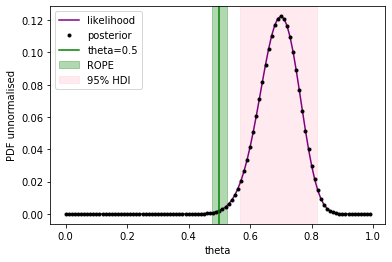

In [23]:
# posterior_mean 
nu =35.
N=50.

# uniform prior = beta(1,1) ie a=1, b=1
a = 1.
b = 1.
# posterior mean + std from analytical approx in lecture notes
posterior_mean = np.float((nu+a)/(N+a+b))
posterior_std = np.sqrt( posterior_mean*(1-posterior_mean)/(nu+a+N-nu+b+1))

# set up credible intervals = mean + / - 1.96 x sigma
HDI_a = posterior_mean+1.96*posterior_std
HDI_b = posterior_mean-1.96*posterior_std

plt.plot(x,likelihood,label='likelihood',c='purple')
plt.plot(x,posterior,'.',label='posterior',c='black',lw=2)

# this makes nice shaded regions to show off where the ROPE is
plt.axvspan(0.5-0.025,0.5+0.025,color='green',label='ROPE',alpha=0.3)
plt.axvspan(HDI_b,HDI_a,color='pink',label='95% HDI',alpha=0.3)

plt.axvline(0.5,color='green',label='theta=0.5')
#plt.ylim(0,6e-14)
plt.ylabel('PDF unnormalised')
plt.xlabel('theta')
plt.legend(loc='upper left')


The fair coin ($\theta=0.5$) falls outside the 95% HDI, so we can reject the null hypothesis that the coin is fair.

Note that we could determine credible intervals if we assume that the posterior were normal by (i) using scipy stats `norm.interval(0.95,mean,std)` function or (ii) numpy's `percentile(data,95)` function.


***
## Your turn
***

<div class="alert alert-block alert-success">Question<br><br>

Ten 20-year old students have their heights measured (in cm) with variance of 50cm. <br><br>

heights = 169.6, 166.8, 157.1, 181.1, 158.4, 165.6, 166.7, 156.5, 168.1, 165.3
<br><br>

A previous set of (normally distributed) measurements said the mean and standard deviation of heights is 170 $\pm$ 3cm.  <br><br>


- Assuming that the heights are drawn from a normal distribution, state what shape the posterior distribution has and derive the mean and standard deviation of the posterior distribution. <br><br>

- Plot the data you observe as a histogram. Also plot the PDFs for the likelihood, the prior and the posterior. Briefly discuss what you see.<br><br>

- Plot the posterior PDF and overplot the mean and standard deviation of the posterior (tip: `plt.axvline(value)` plots a vertical line).<br><br>

- We are going to assume the null hypothesis is that the height of a 20 year old student is $>170$cm.  Test whether the null hypothesis is credible.   <br><br> 

Tip: Determine the 95% credible intervals for the posterior.  Plot this range over your posterior distribution. You can do this using lines `axvline` or `axvspan` to colour the entire range. <br><br>

You can ignore the evidence term.

</div>

**Answer:**

*Your answer here*

165 50 2.23606797749979


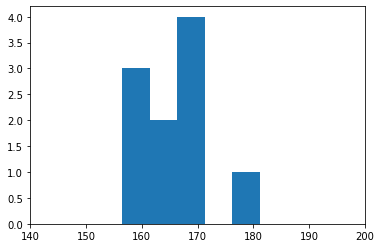

In [190]:
import numpy as np
import pylab as plt
import math

height = [169.6, 166.8, 157.1, 181.1, 158.4, 165.6, 166.7, 156.5, 168.1, 165.3]
n = len(height)
mean = int(np.sum(height)/n)
variance = 50
std = np.sqrt(variance/n)
plt.hist(height,bins='auto')
plt.xlim(140,200)
print(mean,variance,std)

169.3826127028829


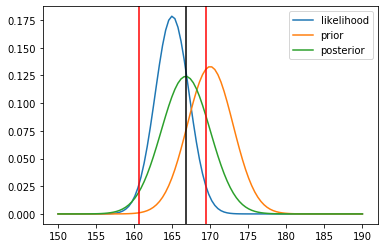

In [205]:
import numpy as np
import pylab as plt
import math
from scipy.stats import norm



def var_hat(var0, var, n):
    value =(var0*(var/n))/(var0+(var/n))
    return value

def mean_theta(var0, var, n, X, mean):
    value =(var0/(var0+(var/n)))*X+((var/n)/(var0+(var/n)))*mean
    return value

height = [169.6, 166.8, 157.1, 181.1, 158.4, 165.6, 166.7, 156.5, 168.1, 165.3]

variance = 50
variance0 = 9
std0 = np.sqrt(variance0)
std = np.sqrt(variance/n)
n = len(height)
mean = int(np.sum(height)/n)
mean0 = 170
x = np.linspace(150,190,100)
post_var = var_hat(variance0, variance, n)
post_mean = mean_theta(variance0, variance, n, mean, mean0)
post_std = np.sqrt(post_var)
likelihood = norm.pdf(x,mean, std)
prior = norm.pdf(x,mean0,std0)
posterior = norm.pdf(x,post_mean,post_var)
plt.plot(x, likelihood, label = 'likelihood')
plt.plot(x, prior, label = 'prior')
plt.plot(x, posterior, label = 'posterior')
plt.legend(loc = 'upper right')
plt.axvline(post_mean, color ='black')
percentile = norm.interval(0.95,mean,std)
plt.axvline(percentile[0], color = 'red')
plt.axvline(percentile[1], color = 'red')

print(percentile[1])
#so as percenticle is <170 we can accept the null hypothesis

<div class="warn">Question:<br><br>

Suppose we have an experiment running $N$ Bernoulli trials where $\nu$ successes are recorded.  The unknown probability of success is $p$. A sutiable uniform prior would be $p(\theta) = 1$.  <br><br> 

One might think we do not gain anything from a uniform prior, but using a uniform prior in a Bernoulli experiment is equivalent to adding two observations to the data, one success and one fail (or one heads, one tails).  Here we will prove it can make a difference.<br><br>

Compare expressions for the expectation value expected from the data (the mean of the Bernoulli distribution) with that from the posterior.<br><br>

Calcualte these for small $N$ and $\nu$ and large $N$ and $\nu$. Discuss what you find.<br><br>

Tip: Above (see also Chapter 5), we gave the analytical equation for the mean of the posterior given Bernoulli/Binomial families and beta priors.  A uniform prior can be considered as a beta(1,1) function.<br><br>

</div>

**Answer:**

*Your answer here:*

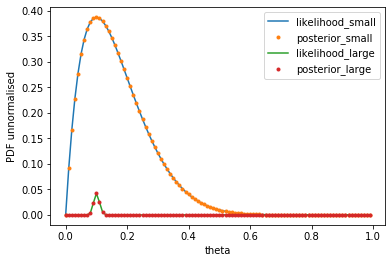

In [215]:
import numpy as np
import pylab as plt
import math

%matplotlib inline

nu1 = 1
N1=10
nu2 = 100
N2=1000
# for plotting
nsteps=100

x = np.arange(0,1,1./nsteps)

likelihood1 = (math.factorial(N1)/(math.factorial(nu1)*(math.factorial(N1-nu1))))*x**nu1 * (1 - x)**(N1 - nu1) 
likelihood2 = (math.factorial(N2)/(math.factorial(nu2)*(math.factorial(N2-nu2))))*x**nu2 * (1 - x)**(N2 - nu2) 
# prior is constant = 1 for all x so need to make this an array
prior = [1.0 for i in range(0,len(x))]

# posterior = likelihood x prior
posterior1 = likelihood1*prior
posterior2 = likelihood2*prior
#let's save an array of x and y for working out credible intervals later

plt.plot(x,likelihood1,label='likelihood_small')
plt.plot(x,posterior1,'.',label='posterior_small')
plt.plot(x,likelihood2,label='likelihood_large')
plt.plot(x,posterior2,'.',label='posterior_large')

#plt.xlim(0,1)
plt.ylabel('PDF unnormalised')
plt.xlabel('theta')
plt.legend(loc='upper right')